# Example 1: 강남 3구는 안전한가?


* 강남3구의 주민들이 자신들이 거주하는 구의 체감 안전도를 높게 생각한다는 기사를 확인해 보도록 한다
* 기사 원문 http://news1.kr/articles/?1911504


### CCTV 데이터

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import numpy as np

matplotlib.rcParams['axes.unicode_minus'] = False
import matplotlib.font_manager as fm
plt.rc('font', family=fm.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()) # for Windows OS user

In [2]:
CCTV_Seoul = pd.read_csv('./data/01. CCTV_in_Seoul.csv',  encoding='utf-8')

In [3]:
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0] : '구별',
                          CCTV_Seoul.columns[1] : 'CCTV수',}, inplace=True)

- 어느 구에 가장 cctv가 많은가? 


In [7]:
CCTV_Seoul.sort_values(by='CCTV수', ascending=False)[:20].head()

,구별,CCTV수,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


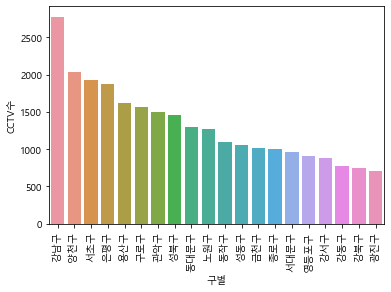

In [6]:
sns.barplot(x='구별',y='CCTV수', data=CCTV_Seoul.sort_values(by='CCTV수', ascending=False)[:20])
plt.xticks(rotation='vertical')
plt.show()

강남, 양천, 서초, 은평, 용산 순으로 많다.

- 최근 3년간 CCTV 증가율이 가장 높은 구는 어디인가?

In [9]:
CCTV_Seoul['CCTV최근증가율'] = (CCTV_Seoul['2016년'] + CCTV_Seoul['2015년'] + 
                        CCTV_Seoul['2014년']) / CCTV_Seoul['2013년도 이전']  * 100

In [10]:
CCTV_Seoul.sort_values(by='CCTV최근증가율',ascending=False).head()

,구별,CCTV수,2013년도 이전,2014년,2015년,2016년,CCTV최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


In [11]:
CCTV_Seoul[['구별','CCTV최근증가율']].sort_values(by='CCTV최근증가율',ascending=False).head()

,구별,CCTV최근증가율
22,종로구,248.922414
9,도봉구,246.638655
12,마포구,212.101911
8,노원구,188.929889
1,강동구,166.490765


최근 cctv가 증가한 구역으로는 종로, 도봉, 마포, 노원, 강동이 있다.

### 서울시 인구데이터

In [12]:
pop_Seoul = pd.read_excel('./data/01. population_in_Seoul.xls', 
                          header = 2,
                          usecols = 'B, D, G, J, N')

In [13]:
pop_Seoul.rename(columns={pop_Seoul.columns[0] : '구별', 
                          pop_Seoul.columns[1] : '인구수', 
                          pop_Seoul.columns[2] : '한국인', 
                          pop_Seoul.columns[3] : '외국인', 
                          pop_Seoul.columns[4] : '고령자'}, inplace=True)
pop_Seoul.drop(0, inplace = True, axis=0)

In [14]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820,153589,9231,25425
2,중구,133240,124312,8928,20764
3,용산구,244203,229456,14747,36231
4,성동구,311244,303380,7864,39997
5,광진구,372164,357211,14953,42214


- 외국인 비율, 고령자 비율 추가

In [15]:
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100

- 가장 인구 수가 많은 구는 어디인가?

In [16]:
pop_Seoul.sort_values(by='인구수', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483,660584,6899,72506,1.033584,10.862599
16,강서구,603772,597248,6524,72548,1.080540,12.015794
23,강남구,570500,565550,4950,63167,0.867660,11.072217
11,노원구,569384,565565,3819,71941,0.670725,12.634883
21,관악구,525515,507203,18312,68082,3.484582,12.955291


- 가장 외국인 수가 많은 구는 어디인가? 가장 외국인 비율이 높은 구는 어디인가?

In [17]:
pop_Seoul.sort_values(by='외국인', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985,368072,34913,52413,8.663598,13.006191
17,구로구,447874,416487,31387,56833,7.007998,12.689506
18,금천구,255082,236353,18729,32970,7.342345,12.925255
21,관악구,525515,507203,18312,68082,3.484582,12.955291
6,동대문구,369496,354079,15417,54173,4.172440,14.661322


- 가장 고령자 수가 많은 구는 어디인가? 가장 고령자 비율이 높은 구는 어디인가?

In [18]:
pop_Seoul.sort_values(by='고령자', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
16,강서구,603772,597248,6524,72548,1.080540,12.015794
24,송파구,667483,660584,6899,72506,1.033584,10.862599
12,은평구,494388,489943,4445,72334,0.899091,14.631019
11,노원구,569384,565565,3819,71941,0.670725,12.634883
21,관악구,525515,507203,18312,68082,3.484582,12.955291


In [19]:
pop_Seoul.sort_values(by='고령자비율', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192,326686,3506,54813,1.061806,16.600342
1,종로구,162820,153589,9231,25425,5.669451,15.615404
2,중구,133240,124312,8928,20764,6.700690,15.583909
3,용산구,244203,229456,14747,36231,6.038828,14.836427
13,서대문구,327163,314982,12181,48161,3.723221,14.720797


### CCTV 데이터와 인구 데이터 합치기 

In [20]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='구별')

In [21]:
data_result.head()

,구별,CCTV수,2013년도 이전,2014년,2015년,2016년,CCTV최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500,565550,4950,63167,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233,449019,4214,54622,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192,326686,3506,54813,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772,597248,6524,72548,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515,507203,18312,68082,3.484582,12.955291


In [22]:
data_result.drop(data_result.columns[2:6],axis=1, inplace=True)

In [23]:
data_result.head()

,구별,CCTV수,CCTV최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500,565550,4950,63167,0.867660,11.072217
1,강동구,773,166.490765,453233,449019,4214,54622,0.929765,12.051638
2,강북구,748,125.203252,330192,326686,3506,54813,1.061806,16.600342
3,강서구,884,134.793814,603772,597248,6524,72548,1.080540,12.015794
4,관악구,1496,149.290780,525515,507203,18312,68082,3.484582,12.955291


In [24]:
data_result.set_index('구별', inplace=True)
data_result.head()

,CCTV수,CCTV최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500,565550,4950,63167,0.867660,11.072217
강동구,773,166.490765,453233,449019,4214,54622,0.929765,12.051638
강북구,748,125.203252,330192,326686,3506,54813,1.061806,16.600342
강서구,884,134.793814,603772,597248,6524,72548,1.080540,12.015794
관악구,1496,149.290780,525515,507203,18312,68082,3.484582,12.955291


In [25]:
data_result.head()

,CCTV수,CCTV최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500,565550,4950,63167,0.867660,11.072217
강동구,773,166.490765,453233,449019,4214,54622,0.929765,12.051638
강북구,748,125.203252,330192,326686,3506,54813,1.061806,16.600342
강서구,884,134.793814,603772,597248,6524,72548,1.080540,12.015794
관악구,1496,149.290780,525515,507203,18312,68082,3.484582,12.955291


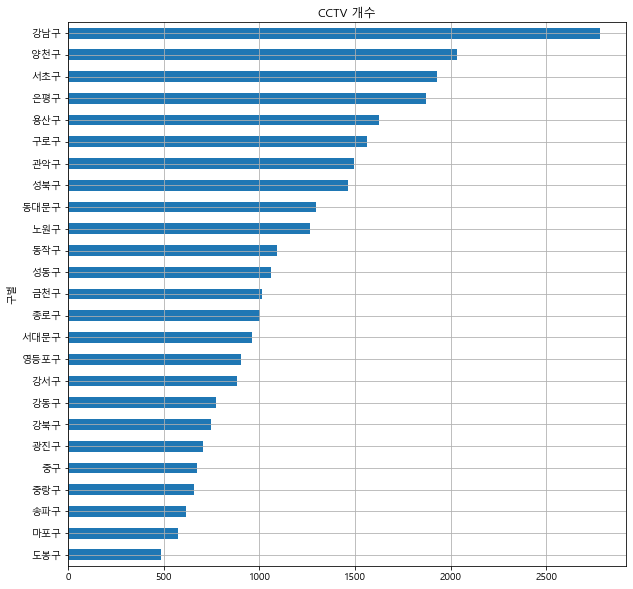

In [26]:
data_result['CCTV수'].sort_values().plot.barh(grid=True, figsize=(10,10))
plt.title('CCTV 개수')
plt.show()

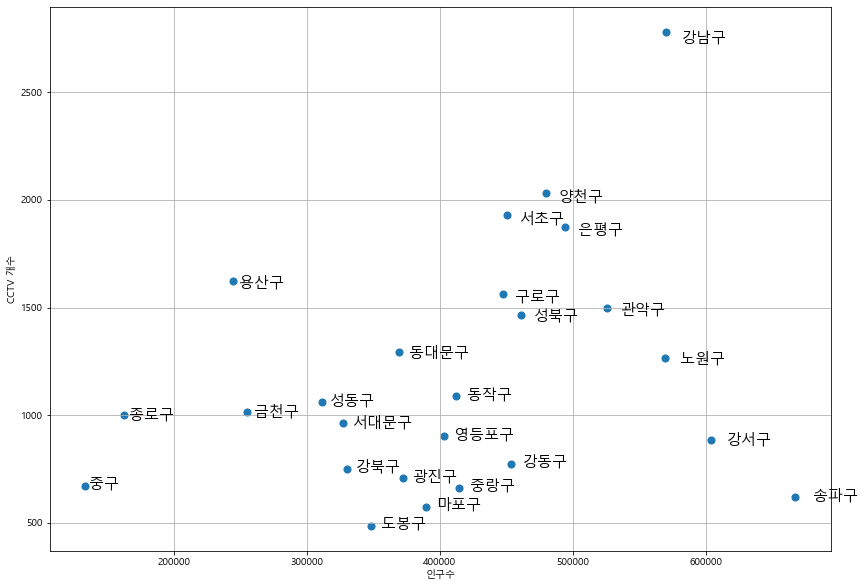

In [41]:
plt.figure(figsize=(14,10))
plt.scatter(data_result['인구수'], data_result['CCTV수'],  s=50)

for n in range(data_result.shape[0]):
    plt.text(data_result['인구수'][n]*1.02, data_result['CCTV수'][n]*0.98, 
             data_result.index[n], fontsize=15)

plt.xlabel('인구수')
plt.ylabel('CCTV 개수')
plt.grid()
plt.show()

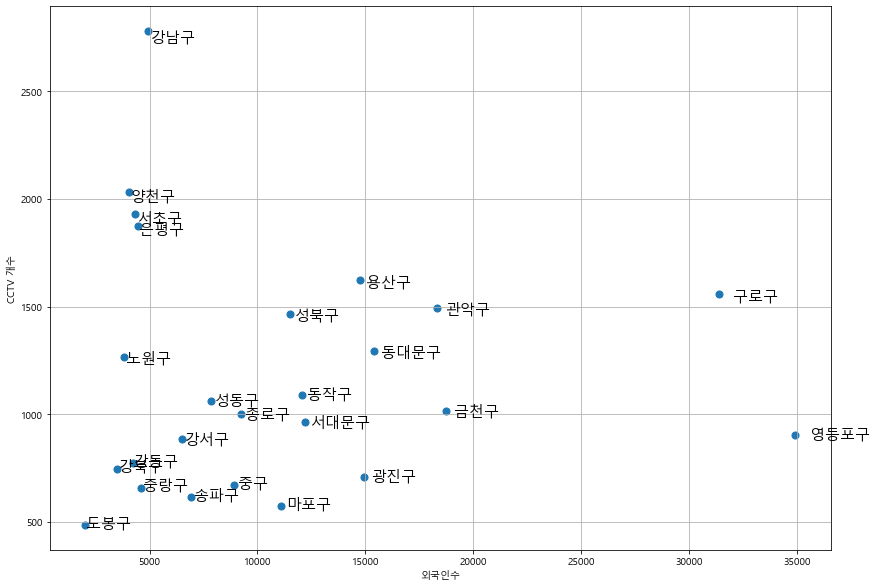

In [42]:
plt.figure(figsize=(14,10))
plt.scatter(data_result['외국인'], data_result['CCTV수'],  s=50)


for n in range(data_result.shape[0]):
    plt.text(data_result['외국인'][n]*1.02, data_result['CCTV수'][n]*0.98, 
             data_result.index[n], fontsize=15)
    
plt.xlabel('외국인수')
plt.ylabel('CCTV 개수')
plt.grid()
plt.show()

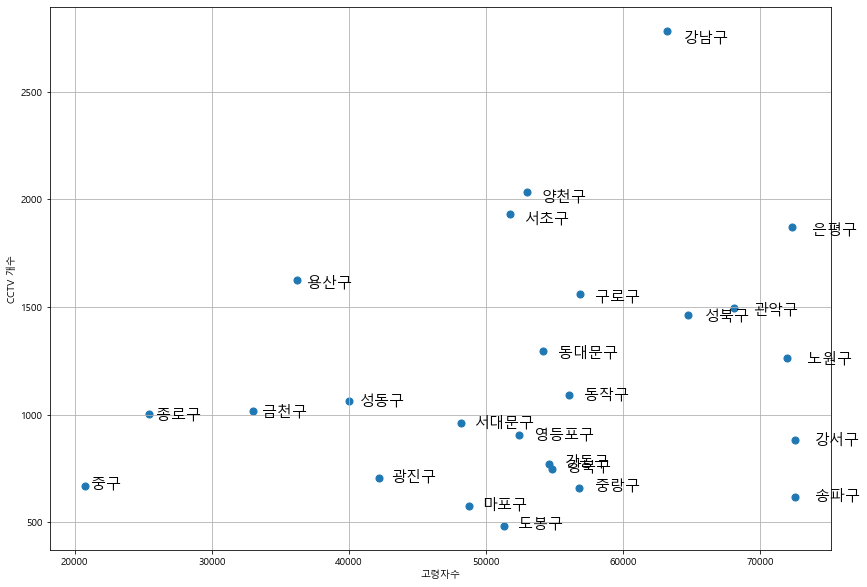

In [43]:
plt.figure(figsize=(14,10))
plt.scatter(data_result['고령자'], data_result['CCTV수'],  s=50)


for n in range(data_result.shape[0]):
    plt.text(data_result['고령자'][n]*1.02, data_result['CCTV수'][n]*0.98, 
             data_result.index[n], fontsize=15)
    
plt.xlabel('고령자수')
plt.ylabel('CCTV 개수')
plt.grid()
plt.show()

- 인구 대비 CCTV 수가 가장 많은 구는?

In [27]:
data_result['CCTV비율'] = data_result['CCTV수'] / data_result['인구수'] * 100

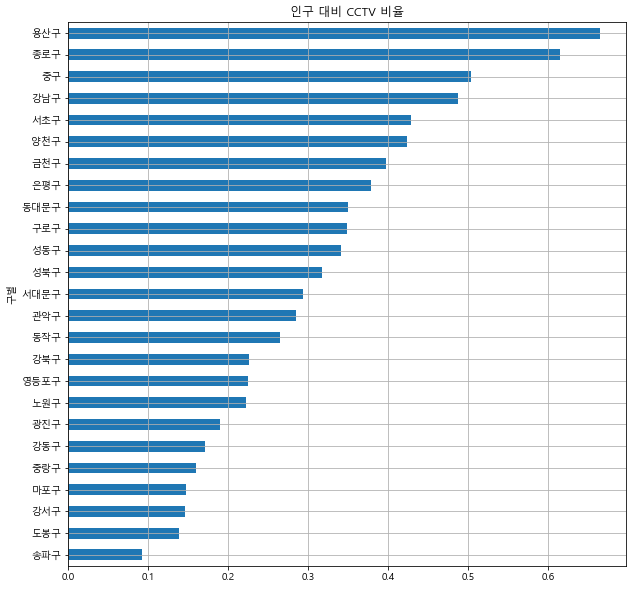

In [28]:
# bar graph
data_result['CCTV비율'].sort_values().plot(kind='barh', 
                                     grid=True, figsize=(10,10))
plt.title('인구 대비 CCTV 비율')
plt.show()

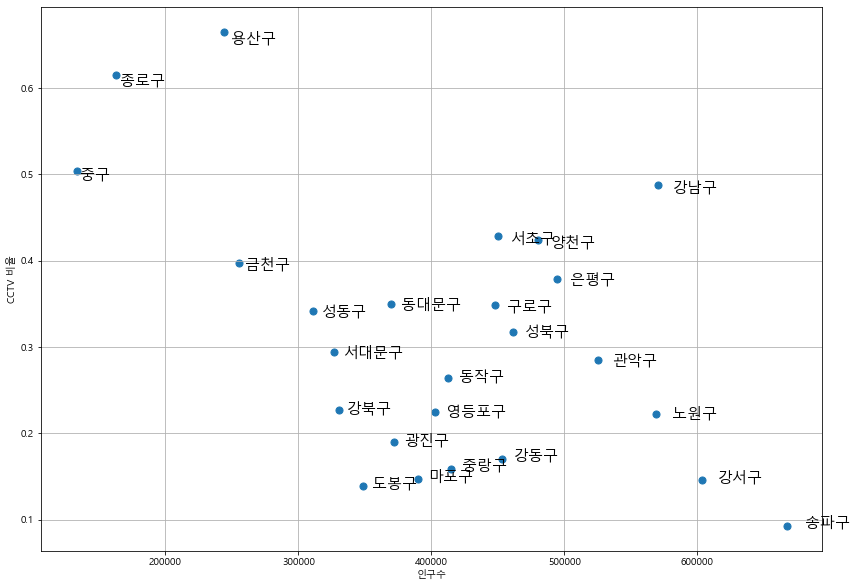

In [29]:
# scatter plot
plt.figure(figsize=(14,10))
plt.scatter(data_result['인구수'], data_result['CCTV비율'],  s=50)


for n in range(data_result.shape[0]):
    plt.text(data_result['인구수'][n]*1.02, data_result['CCTV비율'][n]*0.98, 
             data_result.index[n], fontsize=15)
    
plt.xlabel('인구수')
plt.ylabel('CCTV 비율')
plt.grid()
plt.show()

### 범죄 데이터 

In [30]:
crime_anal_raw = pd.read_csv('./data/02. crime_in_Seoul_include_gu_name.csv', 
                             encoding='utf-8', index_col=0)

In [48]:
crime_anal_raw.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구


In [49]:
crime_anal_raw.구별.value_counts()

강남구     2
양천구     2
은평구     2
중구      2
서초구     2
종로구     2
성북구     2
구로구     1
도봉구     1
용산구     1
노원구     1
관악구     1
성동구     1
중랑구     1
금천구     1
동대문구    1
송파구     1
강북구     1
마포구     1
광진구     1
서대문구    1
강동구     1
영등포구    1
동작구     1
Name: 구별, dtype: int64

- 구별로 범죄 건수 합산

In [31]:
crime_anal=crime_anal_raw.groupby('구별').sum()

In [32]:
crime_anal.rename(columns = {'강간 발생':'강간', 
                             '강도 발생':'강도', 
                             '살인 발생':'살인', 
                             '절도 발생':'절도', 
                             '폭력 발생':'폭력'}, inplace=True)

In [33]:
crime_anal.index.value_counts()

강남구     1
강동구     1
중구      1
종로구     1
은평구     1
용산구     1
영등포구    1
양천구     1
송파구     1
성북구     1
성동구     1
서초구     1
서대문구    1
마포구     1
동작구     1
동대문구    1
도봉구     1
노원구     1
금천구     1
구로구     1
광진구     1
관악구     1
강북구     1
중랑구     1
Name: 구별, dtype: int64

- 총 범죄 건수 추가

In [55]:
col = ['강간', '강도', '살인', '절도', '폭력']
col2 = [x + ' 검거' for x in col]

In [62]:
crime_anal['범죄']=crime_anal[col].sum(axis=1)

In [63]:
crime_anal['범죄'] = np.sum(crime_anal[col], axis=1)
crime_anal['범죄 검거'] = np.sum(crime_anal[col2], axis=1)

In [64]:
crime_anal.head()

,살인,살인 검거,강도,강도 검거,강간,강간 검거,절도,절도 검거,폭력,폭력 검거,범죄,범죄 검거
구별,,,,,,,,,,,,
강남구,13,10,21,18,449,349,3850,1650,4284,3705,8617,5732
강동구,4,3,6,8,156,123,2366,789,2712,2248,5244,3171
강북구,7,8,14,13,153,126,1434,618,2649,2348,4257,3113
관악구,9,8,12,14,320,221,2706,827,3298,2642,6345,3712
광진구,4,4,14,26,240,220,3026,1277,2625,2180,5909,3707


- 검거율 계산

In [65]:
col.append('범죄')
for x in col:
    crime_anal[x+'검거율'] = crime_anal[x+' 검거']/crime_anal[x]*100

In [66]:
col2.append('범죄 검거')
crime_anal.drop(col2, axis=1, inplace=True)

In [68]:
## 검거율이 100 이상인 값을 100으로 수정
col_list = [x +'검거율' for x in col]
for column in col_list:
    crime_anal.loc[crime_anal[column] > 100, column] = 100

In [69]:
crime_anal

,살인,강도,강간,절도,폭력,범죄,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,범죄검거율
구별,,,,,,,,,,,,
강남구,13,21,449,3850,4284,8617,77.728285,85.714286,76.923077,42.857143,86.484594,66.519670
강동구,4,6,156,2366,2712,5244,78.846154,100.000000,75.000000,33.347422,82.890855,60.469108
강북구,7,14,153,1434,2649,4257,82.352941,92.857143,100.000000,43.096234,88.637222,73.126615
관악구,9,12,320,2706,3298,6345,69.062500,100.000000,88.888889,30.561715,80.109157,58.502758
광진구,4,14,240,3026,2625,5909,91.666667,100.000000,100.000000,42.200925,83.047619,62.734811
구로구,8,15,281,2335,3007,5646,58.362989,73.333333,75.000000,38.072805,80.877951,62.026213
금천구,3,6,151,1567,2054,3781,80.794702,100.000000,100.000000,56.668794,86.465433,73.948691
노원구,10,7,197,2193,2723,5130,61.421320,100.000000,100.000000,36.525308,85.530665,63.703704
도봉구,3,9,102,1063,1487,2664,100.000000,100.000000,100.000000,44.967074,87.626093,71.321321


- CCTV/인구 데이터와 결합

In [84]:
data_result

,CCTV수,CCTV최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,2780,150.619195,570500,565550,4950,63167,0.867660,11.072217,0.487292
강동구,773,166.490765,453233,449019,4214,54622,0.929765,12.051638,0.170552
강북구,748,125.203252,330192,326686,3506,54813,1.061806,16.600342,0.226535
강서구,884,134.793814,603772,597248,6524,72548,1.080540,12.015794,0.146413
관악구,1496,149.290780,525515,507203,18312,68082,3.484582,12.955291,0.284673
광진구,707,53.228621,372164,357211,14953,42214,4.017852,11.342849,0.189970
구로구,1561,64.973730,447874,416487,31387,56833,7.007998,12.689506,0.348536
금천구,1015,100.000000,255082,236353,18729,32970,7.342345,12.925255,0.397911
노원구,1265,188.929889,569384,565565,3819,71941,0.670725,12.634883,0.222170


In [70]:
data_result = pd.merge(crime_anal, data_result, left_index=True, right_index=True)

- 인구 대비 범죄발생 건수 계산

In [71]:
for x in col:
    data_result[x+'율'] = data_result[x]/data_result['인구수']*10000

In [72]:
data_result.head()

,살인,강도,강간,절도,폭력,범죄,강간검거율,강도검거율,살인검거율,절도검거율,...,한국인,외국인,고령자,CCTV비율,강간율,강도율,살인율,절도율,폭력율,범죄율
구별,,,,,,,,,,,,,,,,,,,,,
강남구,13,21,449,3850,4284,8617,77.728285,85.714286,76.923077,42.857143,...,565550,4950,63167,0.487292,7.870289,0.368098,0.227870,67.484663,75.092025,151.042945
강동구,4,6,156,2366,2712,5244,78.846154,100.000000,75.000000,33.347422,...,449019,4214,54622,0.170552,3.441938,0.132382,0.088255,52.202730,59.836773,115.702078
강북구,7,14,153,1434,2649,4257,82.352941,92.857143,100.000000,43.096234,...,326686,3506,54813,0.226535,4.633668,0.423996,0.211998,43.429278,80.226050,128.924989
관악구,9,12,320,2706,3298,6345,69.062500,100.000000,88.888889,30.561715,...,507203,18312,68082,0.284673,6.089265,0.228347,0.171261,51.492346,62.757486,120.738704
광진구,4,14,240,3026,2625,5909,91.666667,100.000000,100.000000,42.200925,...,357211,14953,42214,0.189970,6.448770,0.376178,0.107479,81.308240,70.533421,158.774089


- 외국인 대비 범죄발생 건수 계산

In [74]:
for x in col:
    data_result['외국인'+x+'율'] = data_result[x]/data_result['외국인']*1000

- 고령자 대비 범죄발생 건수 계산

In [275]:
for x in col:
    data_result['고령자'+x+'율'] = data_result[x]/data_result['고령자']*1000

- 상대적 비교를 위해 각 변수를 표준화 

In [73]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(data_result)
data_result_norm = pd.DataFrame(x_scaled, 
                                columns = data_result.columns, 
                                index = data_result.index)

- 어느 구가 상대적으로 범죄율이 높은가? 

In [74]:
col_target = [x +'율' for x in col]

In [75]:
data_result_norm.sort_values(by="범죄율",ascending=False)[col_target]

,강간율,강도율,살인율,절도율,폭력율,범죄율
구별,,,,,,
중구,0.980050,0.999789,0.534320,1.000000,1.000000,1.000000
종로구,1.000000,1.000000,1.000000,0.644790,0.790076,0.719564
양천구,0.501629,0.506798,0.479696,0.326954,0.615116,0.454594
영등포구,0.438010,0.771389,0.931462,0.267889,0.370075,0.318190
광진구,0.351141,0.472113,0.152030,0.316147,0.224379,0.278822
용산구,0.500185,0.819640,0.468016,0.206969,0.332318,0.270878
강남구,0.492818,0.457867,0.543132,0.230150,0.261063,0.252651
마포구,0.460423,0.442351,0.469853,0.218250,0.272845,0.249925
금천구,0.298407,0.223591,0.184937,0.192491,0.304769,0.243117


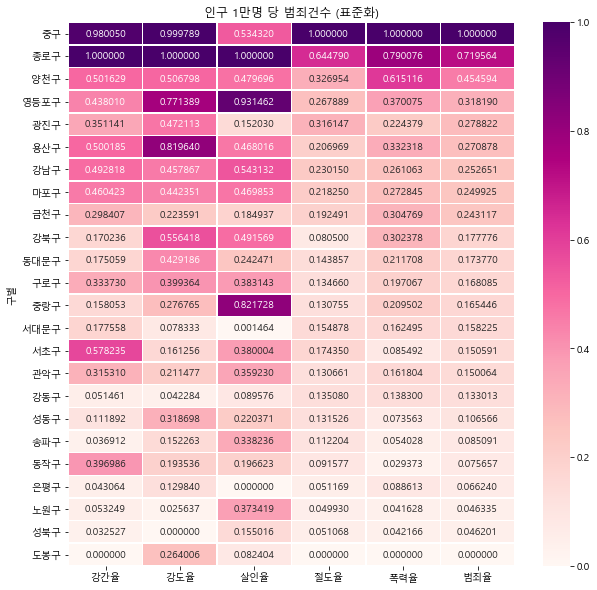

In [77]:
col_target = [x+'율' for x in col]

plt.figure(figsize = (10,10))
sns.heatmap(data_result_norm.sort_values(by="범죄율",ascending=False)[col_target], 
            annot=True, fmt='f', linewidths=.5,
                       cmap='RdPu')
plt.title('인구 1만명 당 범죄건수 (표준화)')
plt.show()

- 어느 구가 상대적으로 범죄검거율이 높은가? 

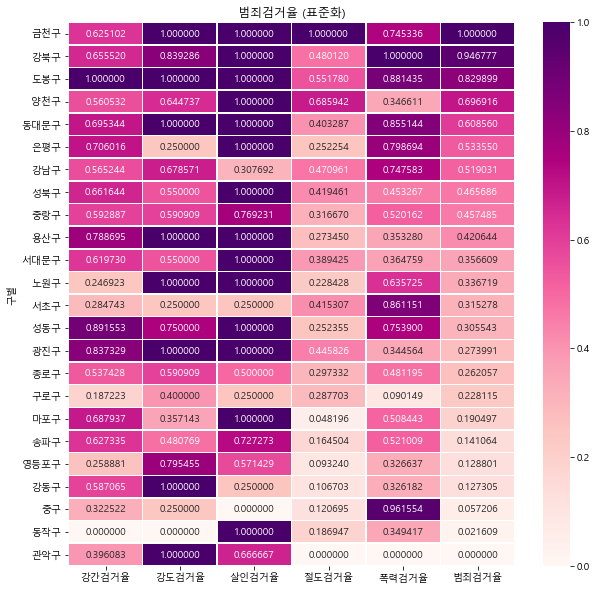

In [78]:
col_target = [x+'검거율' for x in col]

plt.figure(figsize = (10,10))
sns.heatmap(data_result_norm.sort_values(by="범죄검거율",ascending=False)[col_target], 
            annot=True, fmt='f', linewidths=.5,
                       cmap='RdPu')
plt.title('범죄검거율 (표준화)')
plt.show()

- 범죄 발생 건수 간의 상관관계

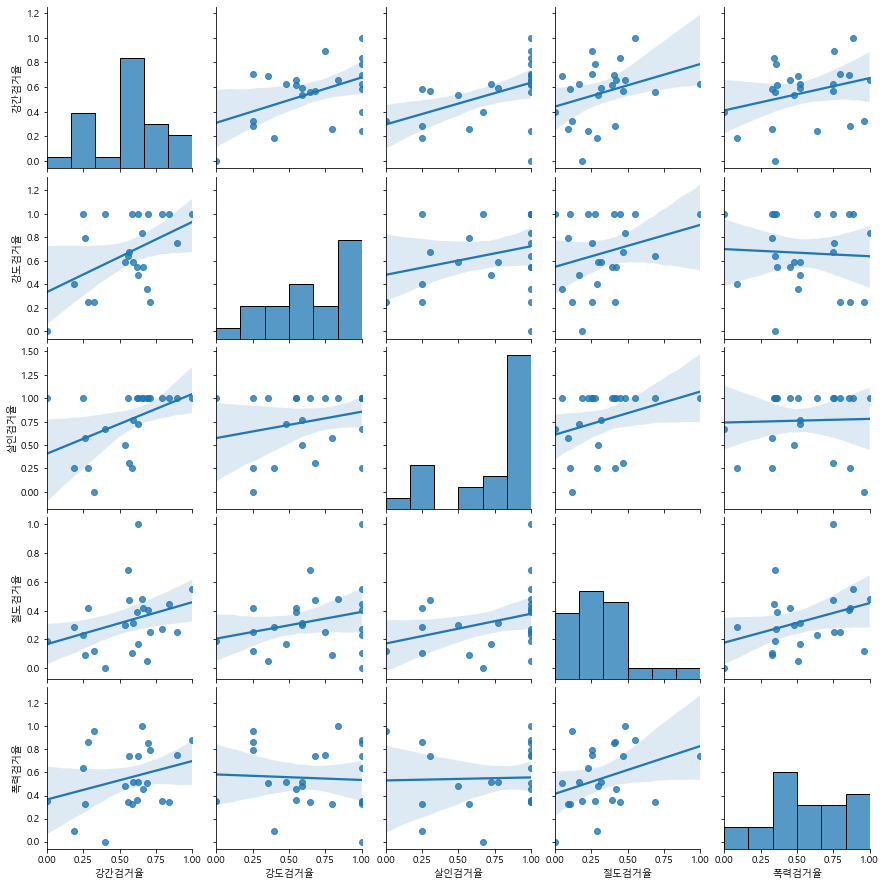

In [81]:
sns.pairplot(data_result_norm, vars=col_target[:5], kind='reg')
plt.show()

- 범죄 발생과 인구수, CCTV 수와의 관계

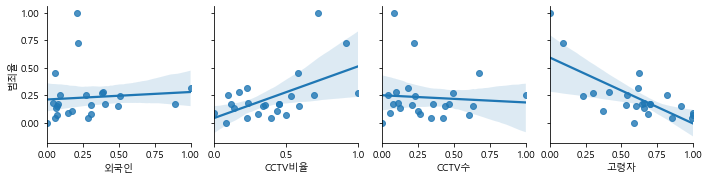

In [85]:
sns.pairplot(data_result_norm, x_vars=["외국인","CCTV비율",'CCTV수','고령자'], 
             y_vars='범죄율', kind='reg')
plt.show()

- 범죄발생율, 범죄검거율과 인구, CCTV비율, 외국인비율 등의 관계는 어떤가? 강남3구가 안전하다고 할 수 있는가?

In [86]:
col_target = [x+'검거율' for x in col]

plt.figure(figsize = (10,10))
sns.heatmap(data_result_norm[['CCTV비율','외국인비율']].sort_values(by="CCTV비율",ascending=False), 
            annot=True, fmt='f', linewidths=.5,
                       cmap='RdPu')
plt.title('CCTV비율과 외국인비율(표준화)')
plt.show();
#높은게 좋음

KeyError: "['외국인비율'] not in index"

<Figure size 720x720 with 0 Axes>

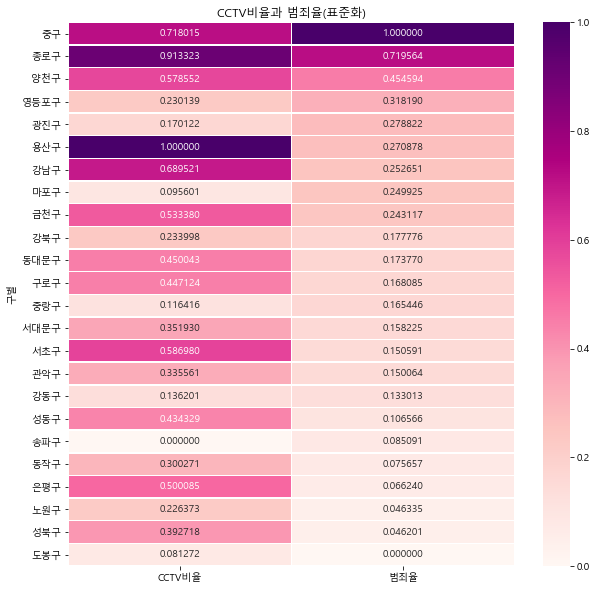

In [88]:
plt.figure(figsize = (10,10))
sns.heatmap(data_result_norm[['CCTV비율','범죄율']].sort_values(by="범죄율",ascending=False), 
            annot=True, fmt='f', linewidths=.5,
                       cmap='RdPu')
plt.title('CCTV비율과 범죄율(표준화)')
plt.show();
#높은게 좋음

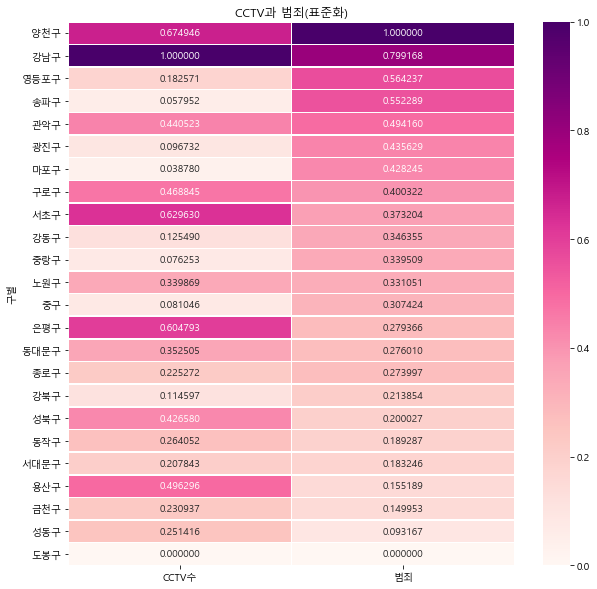

In [99]:
plt.figure(figsize = (10,10))
sns.heatmap(data_result_norm[['CCTV수','범죄']].sort_values(by="범죄",ascending=False), 
            annot=True, fmt='f', linewidths=.5,
                       cmap='RdPu')
plt.title('CCTV과 범죄(표준화)')
plt.show();

In [97]:
import scipy.stats as stats
stats.pearsonr(data_result.CCTV수, data_result.범죄)

(0.4742694967963458, 0.019208168617501038)

강남구는 일단 외국인에 대해서 보자면 외국인수가 엄청 적고 외국인 비율 또한 낮다. 그렇기 때문에 외국인과 범죄율의 관계를 깊게 볼 필요는 없을 것 같다. 그리고 cctv와의 관계이다. 일단 먼저 cctv의 수로 봤을 때 강남이 가장 많다. cctv비율로 봤을 때도 4위이다. cctv가 많은 곳은 범죄로 부터 안전하다라고 가정을 하고 비교를 하였을 때 먼저 cctv수와 범죄수를 보면 cctv가 많은 곳에 범죄도 많이 일어났다. 이것만 본다면 안전하다고 하지 못한다. 오히려 범죄가 많은 곳에 cctv의 많이 설치한다는 것이 더 적합해보인다. 그리고 인구수와 함께 비교를 하기 위해 비율을 구하여 cctv비율과 범죄율을 비교를 해봐도 cctv비율이 높은 곳에 범죄율도 낮지 않고 나름 높았다. 이를 보면 범죄가 많이 일어나는 쪽에 cctv가 많이 설치된다고 볼 수 있고 그러면 강남은 cctv는 많지만 이것이 범죄가 많이 일어났기 때문이라고 보인다. 물론 인구로 비율을 구했을 때 범죄율은 그리 높지 않지만 cctv 비율은 높은 것으로 보아 열심히 만들고 있는 것으로 보인다. 안전하다고는 할 수 없다